In [135]:
!pip install paddlepaddle-gpu
!pip install paddleocr

In [136]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

In [137]:
!pip install gTTS gradio pdfminer.six

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47366, done.
remote: Counting objects: 100% (610/610), done.
remote: Compressing objects: 100% (378/378), done.
remote: Total 47366 (delta 385), reused 410 (delta 229), pack-reused 46756
Receiving objects: 100% (47366/47366), 343.80 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (33251/33251), done.


In [130]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
from gtts import gTTS
from PIL import Image
import gradio as gr
import pickle
import cv2
import os

In [51]:
ocr = PaddleOCR(lang='en')

[2023/10/02 19:45:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [62]:
img_path = '/content/attachment_100951433.jfif'
result = ocr.ocr(img_path)

[2023/10/02 19:49:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2023/10/02 19:49:52] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.09238719940185547
[2023/10/02 19:49:52] ppocr DEBUG: rec_res num  : 10, elapsed : 0.06261920928955078


In [63]:
result

[[[[[193.0, 187.0], [306.0, 187.0], [306.0, 203.0], [193.0, 203.0]],
   ('GreentreeBio', 0.996408998966217)],
  [[[161.0, 229.0], [346.0, 229.0], [346.0, 257.0], [161.0, 257.0]],
   ('DIGESTIVE', 0.9905946254730225)],
  [[[160.0, 267.0], [311.0, 267.0], [311.0, 297.0], [160.0, 297.0]],
   ('ENZYME', 0.9976263642311096)],
  [[[160.0, 305.0], [258.0, 305.0], [258.0, 321.0], [160.0, 321.0]],
   ('PRO BLEND', 0.9451267719268799)],
  [[[158.0, 324.0], [246.0, 322.0], [246.0, 336.0], [158.0, 338.0]],
   ('MAKZYME-PRO', 0.9931076169013977)],
  [[[159.0, 339.0], [230.0, 339.0], [230.0, 353.0], [159.0, 353.0]],
   ('Enzyme Blend', 0.9812341332435608)],
  [[[159.0, 357.0], [274.0, 357.0], [274.0, 367.0], [159.0, 367.0]],
   ('#Prevents Gas.Bloating & Indigestion', 0.8676157593727112)],
  [[[159.0, 369.0], [265.0, 369.0], [265.0, 379.0], [159.0, 379.0]],
   ('#Break Down Fat Carbs & Protein*', 0.9347203969955444)],
  [[[160.0, 381.0], [263.0, 381.0], [263.0, 391.0], [160.0, 391.0]],
   ('#Absorb 

In [64]:
all_text = []
for block in result:
    for line in block:
        text = line[1][0]
        all_text.append(text)

In [65]:
for text in all_text:
    print(text)

GreentreeBio
DIGESTIVE
ENZYME
PRO BLEND
MAKZYME-PRO
Enzyme Blend
#Prevents Gas.Bloating & Indigestion
#Break Down Fat Carbs & Protein*
#Absorb Vital Nutrients Efficiently
#Healthy Digestion Support*


In [67]:
boxes = []
txts = []
scores = []
for item in result:
    for subitem in item:
        boxes.append(subitem[0])
        txts.append(subitem[1][0])
        scores.append(subitem[1][1])

In [68]:
scores

[0.996408998966217,
 0.9905946254730225,
 0.9976263642311096,
 0.9451267719268799,
 0.9931076169013977,
 0.9812341332435608,
 0.8676157593727112,
 0.9347203969955444,
 0.9565304517745972,
 0.9747845530509949]

In [69]:
font_path = '/content/PaddleOCR/doc/fonts/latin.ttf'

In [70]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

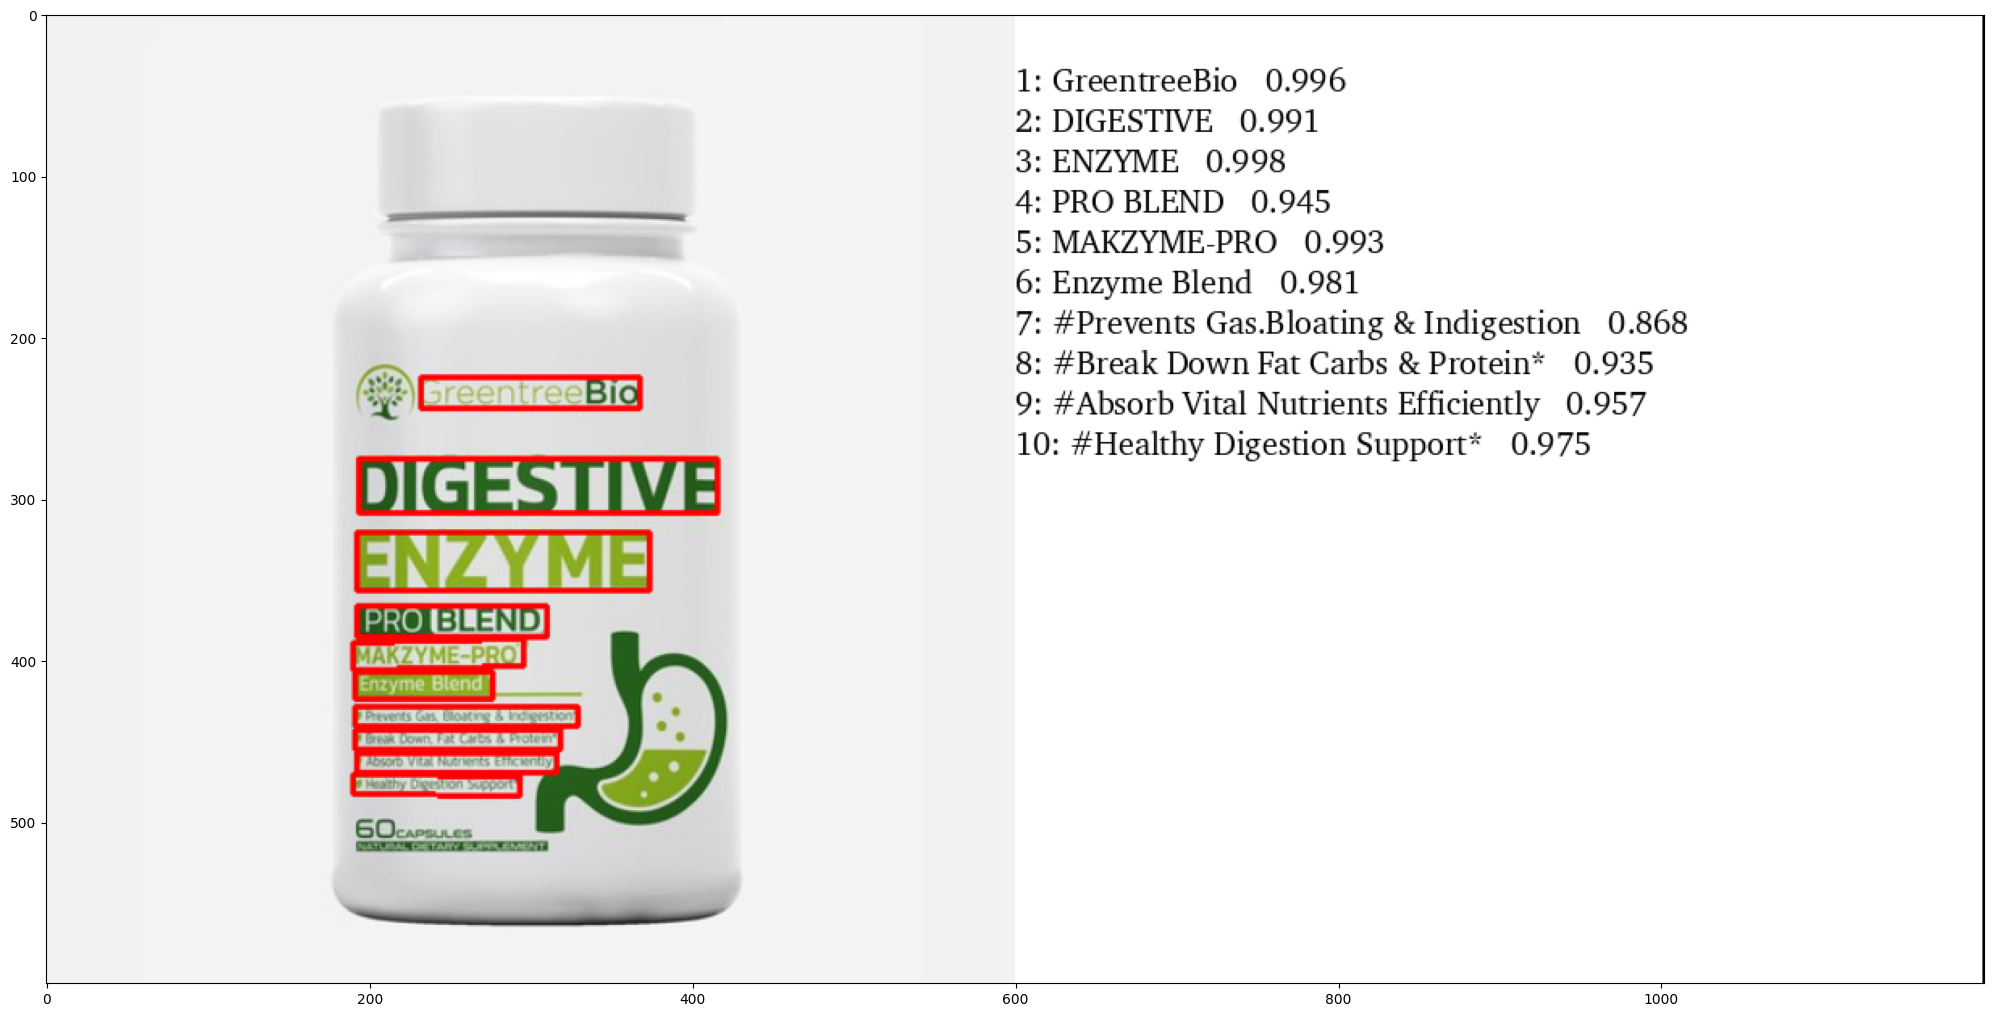

In [71]:
plt.figure(figsize=(25,35))
annotated = draw_ocr(img, boxes, txts, scores, font_path=font_path)
plt.imshow(annotated)

## here we join all the text and after that store into text file and that coverted into pdf

In [72]:
my_texts =' '.join(txts)
my_texts

'GreentreeBio DIGESTIVE ENZYME PRO BLEND MAKZYME-PRO Enzyme Blend #Prevents Gas.Bloating & Indigestion #Break Down Fat Carbs & Protein* #Absorb Vital Nutrients Efficiently #Healthy Digestion Support*'

In [96]:
f=open("output.txt","w")
f.write(my_texts)

198

Now This text will covert into Mp3

In [98]:
f=open("/content/output.txt","r")
read_file=f.read()
convert_audio= gTTS(text=read_file,lang='en',slow = False)
convert_audio.save("good.mp3")

In [99]:
model = open('model.pkl', 'wb')
pickle.dump(convert_audio, model)

In [132]:
def pdf_to_text(file):
   text = file.name
   myobj = gTTS(text=read_file, lang='en', slow=False)
   myobj.save("output.wav")
   return 'output.wav'

In [ ]:
iface = gr.Interface(
   fn = pdf_to_text,
   inputs = 'file',
   outputs = 'audio',
   title="Text to  Audio Conversion",
   description="Upload a text file and get the content as audio."
   )
iface.launch(debug=True)

Here one more thing whre we can directly give image and from that it will convert into audio

In [131]:
def image_to_audio(input_image):
    img = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    result = ocr.ocr(img)
    all_text = []
    for block in result[0]:
        text = block[1][0]
        all_text.append(text)
    full_text = ' '.join(all_text)
    audio = gTTS(text=full_text, lang='en', slow=False)
    audio_path = "output.mp3"
    audio.save(audio_path)
    image_pil = Image.fromarray(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

    return image_pil, audio_path, full_text, full_text  # Return the text twice, once for image and once for audio

In [ ]:
iface = gr.Interface(
    fn=image_to_audio,
    inputs=gr.inputs.Image(),
    outputs=[
        gr.outputs.Image(type="pil"),
        gr.outputs.Audio(type="filepath"),
        gr.outputs.Textbox(label="Text from Image"),
        gr.outputs.Textbox(label="Text from Audio")
    ],
    title="Image to Audio Conversion",
    description="Upload an image containing text, and it will be converted to audio while displaying the text.",
)

iface.launch()